In [20]:
f = lambda x : x**2
x1 = np.array([-1,0,1,2])
x2 = f(x1)
x2

array([1, 0, 1, 4])

<img src=images/0923/1.PNG>

In [5]:
# 함수 정의
def f(x):
    return 6*x**2 + 7*x + 8

In [17]:
# 1. 미분 (정의 이용)
def derivative(f, a, h=1e-6):
    return (f(a+h) - f(a)) / h
# h=0.0000000001

In [14]:
[{'값:'+str(i):derivative(lambda x:x**2, i)} for i in range(-10,10)]

[{'값:-10': -19.999998983166734},
 {'값:-9': -17.999998988216248},
 {'값:-8': -15.99999900037119},
 {'값:-7': -13.999999005420705},
 {'값:-6': -11.999999003364792},
 {'값:-5': -9.999999001308879},
 {'값:-4': -7.999999001029323},
 {'값:-3': -5.999999000749767},
 {'값:-2': -3.999998999582033},
 {'값:-1': -1.999999000079633},
 {'값:0': 1e-06},
 {'값:1': 2.0000009999243673},
 {'값:2': 4.0000010006480125},
 {'값:3': 6.000001000927568},
 {'값:4': 8.000000999430767},
 {'값:5': 10.00000100148668},
 {'값:6': 12.00000099998988},
 {'값:7': 14.000001002045792},
 {'값:8': 16.000000982785423},
 {'값:9': 18.000000991946763}]

In [19]:
np.linspace(-1,1,100)[:5]
#-1부터 1까지 100개로 쪼개서 5개만 받아옴

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192])

In [7]:
# 2. 적분 (리만 합)
def riemann_integral(f, a, b, n=10000):
    dx = (b - a) / n
    x = np.linspace(a, b-dx, n)  # 왼쪽 리만 합
    return np.sum(f(x) * dx)

In [8]:
import numpy as np

# 테스트
a_point = 2
print("미분 (f'(2) 근사) =", derivative(f, a_point))

integral_val = riemann_integral(f, 0, 3, n=10000)
print("적분 (∫_0^3 f(x) dx 근사) =", integral_val)

# 검증 (정확 해석값)
# f'(x) = 12x + 7, f'(2)=31
print("실제 미분 f'(2) =", 12*a_point + 7)

# ∫_0^3 (6x^2+7x+8) dx = [2x^3 + (7/2)x^2 + 8x]_0^3
exact_integral = (2*3**3 + (7/2)*3**2 + 8*3) - 0
print("실제 적분 =", exact_integral)

미분 (f'(2) 근사) = 31.000006003978342
적분 (∫_0^3 f(x) dx 근사) = 109.48875027
실제 미분 f'(2) = 31
실제 적분 = 109.5


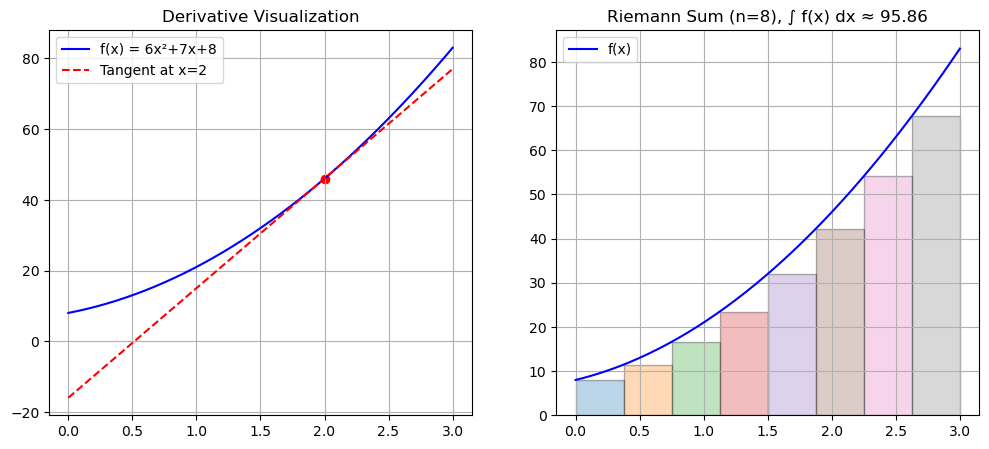

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 함수 정의
def f(x):
    return 6*x**2 + 7*x + 8

# 1. 미분 (정의 이용)
def derivative(f, a, h=1e-6):
    return (f(a+h) - f(a)) / h

# 2. 적분 (리만 합)
def riemann_sum(f, a, b, n=20):  # n을 작게 해서 직사각형 잘 보이도록
    dx = (b - a) / n
    x = np.linspace(a, b-dx, n)
    y = f(x)
    return np.sum(y * dx), x, y, dx

# ===== 미분 시각화 =====
a_point = 2
slope = derivative(f, a_point)
tangent_line = lambda x: f(a_point) + slope * (x - a_point)

x_vals = np.linspace(0, 3, 200)
plt.figure(figsize=(12,5))

# (1) 미분 그래프
plt.subplot(1,2,1)
plt.plot(x_vals, f(x_vals), 'b', label="f(x) = 6x²+7x+8")
plt.plot(x_vals, tangent_line(x_vals), 'r--', label=f"Tangent at x={a_point}")
plt.scatter([a_point], [f(a_point)], color='red')
plt.title("Derivative Visualization")
plt.legend()
plt.grid(True)

# ===== 적분 시각화 =====
a, b, n = 0, 3, 8
integral_val, x_rect, y_rect, dx = riemann_sum(f, a, b, n)

plt.subplot(1,2,2)
plt.plot(x_vals, f(x_vals), 'b', label="f(x)")
for i in range(n):
    plt.bar(x_rect[i], y_rect[i], width=dx, align='edge',
            alpha=0.3, edgecolor='black')

plt.title(f"Riemann Sum (n={n}), ∫ f(x) dx ≈ {integral_val:.2f}")
plt.legend()
plt.grid(True)

plt.show()